In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

annot_csv=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week6/week6.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
data_dir=Path("D:/OAK_D_img/oak-d-camera/weeks/week6/")
RGB_IMAGE_SIZE = (1080,1920)
DEPTH_IMAGE_SIZE = (720,1280)

resize_RGB = (512,910)
resize_depth = (599,1065)

In [2]:
df=pd.read_csv(annot_csv, header=0, names=['no', 'date', 'time', 'week', 'row', 'stop', 'image', 'speciesid', 'commonname', 'pot'], index_col=0)

In [3]:
df['annotation_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('.png', '.txt'))))
print(df['annotation_file'][1])
df['mask_dir']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('_rgb.png', '_mask.png'))))
print(df['mask_dir'][1])
df['image_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x)))
print(df['image_file'][1])

D:\OAK_D_img\oak-d-camera\bbox_package\week6\wk6_row1_stop6_20210428_091434_rgb.txt
D:\OAK_D_img\oak-d-camera\bbox_package\week6\wk6_row1_stop6_20210428_091434_mask.png
D:\OAK_D_img\oak-d-camera\bbox_package\week6\wk6_row1_stop6_20210428_091434_rgb.png


In [4]:
def create_image_path(x):
    #print(Path(x[10]))
    #print(os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\')))
    return os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\'))
def get_disp_map_path(x):
    return sorted(Path(x[12]).rglob('*map30.png'))[-1]
def get_depth_path(x): 
    return sorted(Path(x[12]).rglob('*30.npy'))[-1]



In [5]:
df['image_dir']=df.apply(create_image_path, axis=1)
#print(df['image_dir'])
df['depth_dir']=df.apply(get_depth_path, axis=1)
print(df['depth_dir'][1])
df['disp_map_dir']=df.apply(get_disp_map_path,axis=1)
df['annotations']=df['annotation_file'].apply(lambda x: np.loadtxt(x))



D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop6\2021_04_28_09_15_11\depth30.npy


In [6]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,mask_dir,image_file,image_dir,depth_dir,disp_map_dir,annotations
no,,,,,,,,,,,,,,,,
0,20210428,90810,wk6,row1,stop1,wk6_row1_stop1_20210428_090810_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop1,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop1\...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop1\...,"[0.0, 0.435677, 0.488426, 0.268229, 0.297222]"
1,20210428,91434,wk6,row1,stop6,wk6_row1_stop6_20210428_091434_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop6,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop6\...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop6\...,"[0.0, 0.476823, 0.415278, 0.227604, 0.25463]"
2,20210428,91923,wk6,row1,stop9,wk6_row1_stop9_20210428_091923_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop9,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop9\...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop9\...,"[0.0, 0.46224, 0.364352, 0.241146, 0.397222]"
3,20210428,92437,wk6,row1,stop13,wk6_row1_stop13_20210428_092437_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop13,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop13...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop13...,"[0.0, 0.436979, 0.453704, 0.227083, 0.366667]"
4,20210428,92853,wk6,row1,stop16,wk6_row1_stop16_20210428_092853_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop16,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop16...,D:\OAK_D_img\oak-d-camera\weeks\week6\1\stop16...,"[0.0, 0.450521, 0.617593, 0.214583, 0.411111]"


In [7]:
from scipy import ndimage, misc

def open_depth_slices(x): 
    label=x['annotations']
    #H, W=(1080*0.57, 1920*0.57)
    H, W=(1080*0.474, 1920*0.474)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    result = ndimage.zoom(np.load(x['depth_dir']), 0.832)
    #return np.load(x['depth_dir'])[y1+72:y2+72,x1+119:x2+119]
    return result[y1+60:y2+60,x1+115:x2+115]


def open_masks(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['mask_dir']),cv2.COLOR_BGR2GRAY)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]

def open_dispmaps(x):
    label=x['annotations']
    H, W=(1080*0.474, 1920*0.474)
    dsize = (round(1280*0.832), round(720*0.832))
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    dmap=cv2.imread(str(x['disp_map_dir']))
    dmap=cv2.resize(dmap,dsize)
    #return dmap[y1+60:y2+60,x1+115:x2+115]
    return dmap[y1+60:y2+60,x1+115:x2+115]


def open_rgb(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['image_file']),cv2.COLOR_BGR2RGB)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]



def create_histograms(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['depth_slices'],list(range(0,65535,50)))

def create_histograms_maps(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['disp_maps'],list(range(0,255,1)))

In [8]:
df['depth_slices']=df.apply(open_depth_slices, axis=1)
df['mask']=df.apply(open_masks, axis=1)
df['disp_maps']=df.apply(open_dispmaps, axis=1)
df['histograms']=df.apply(create_histograms, axis=1)
df['histograms_map']=df.apply(create_histograms_maps, axis=1)
df['origin'] =df.apply(open_rgb, axis=1) 


In [9]:
test_img=7
df['mask'][test_img].shape, df['depth_slices'][test_img].shape, df['disp_maps'][test_img].shape, df['origin'][test_img].shape

((200, 191), (200, 191), (200, 191, 3), (200, 191, 3))

In [10]:
df['disp_maps'][test_img].max()

255

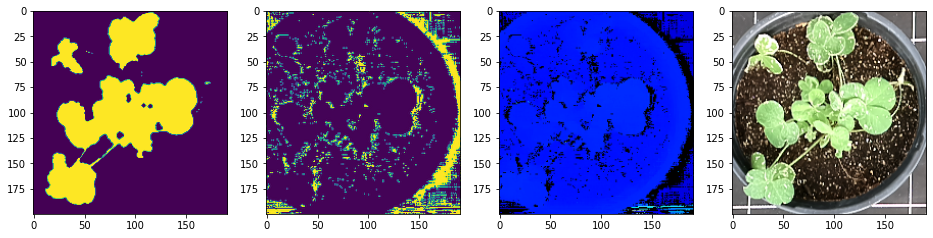

In [11]:
plt.figure(figsize=(16,16)); 
plt.subplot(141);plt.imshow(df['mask'][test_img]); 
plt.subplot(142); plt.imshow(df['depth_slices'][test_img]); 
plt.subplot(143); plt.imshow(df['disp_maps'][test_img])
plt.subplot(144); plt.imshow(df['origin'][test_img])


In [12]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np



###VI funtions
def make_exg(x):
    # rgb_img: np array in [RGB] channel order
    # EXG = 2 * G - R - B
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exg = 2*green - red - blue
    exg = np.where(exg < 0, 0, exg).astype('uint8') # Thresholding removes low negative values (noise)
    return exg


def make_ndi(x):
    # rgb_img: np array in [RGB] channel order
    # NDI = 128 * (((G - R) / (G + R)) + 1)
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    gminr = (green - red)
    gplusr = (green + red)
    gdivr = np.true_divide(gminr, gplusr, where=gplusr!=0) # /, out=np.zeros_like(gminr),
    ndi = 128 * (gdivr  + 1)
    return ndi


def make_exr(x):
    # rgb_img: np array in [RGB] channel order
    # EXR = 1.4 * R - G
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exr = 1.4 * red - green
    exr = np.where(exr < 0, 0, exr).astype('uint8') # Thresholding removes low negative values
    return exr


def exg_minus_exr(x):
    exg = make_exg(x)
    exr = make_exr(x)

    exgr = exg - exr
    exgr = np.where(exgr < 25, 0, exgr).astype('uint8')
    return exgr


In [13]:
df['exg']=df.apply(make_exg, axis=1)
df['exr']=df.apply(make_exr, axis=1)
df['ndi']=df.apply(make_ndi, axis=1)
df['exg-exr']=df.apply(exg_minus_exr, axis=1)


d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in multiply


In [14]:
def area(x):
    binary = x['mask'].astype(int) #x['mask']
    return binary
df['area']=df.apply(area, axis=1)

In [15]:
df['exg'][test_img].shape, df['exr'][test_img].shape, df['ndi'][test_img].shape, df['exg-exr'][test_img].shape, df['area'][test_img].shape, df['mask'][test_img].shape

((200, 191), (200, 191), (200, 191), (200, 191), (200, 191), (200, 191))

Text(0.5, 1.0, 'Area')

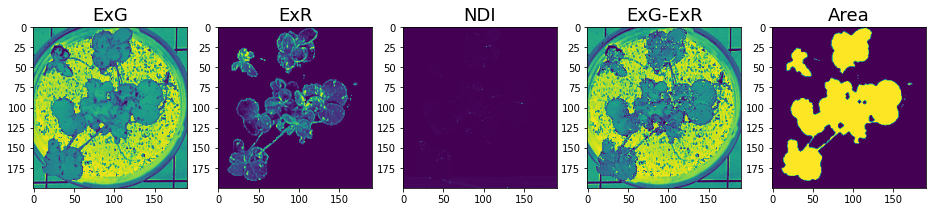

In [16]:
plt.figure(figsize=(16,16)); 
plt.subplot(151); plt.imshow(df['exg'][test_img]); plt.title('ExG',fontsize=18)
plt.subplot(152); plt.imshow(df['exr'][test_img]); plt.title('ExR',fontsize=18) 
plt.subplot(153); plt.imshow(df['ndi'][test_img]); plt.title('NDI',fontsize=18)
plt.subplot(154); plt.imshow(df['exg-exr'][test_img]); plt.title('ExG-ExR',fontsize=18)
plt.subplot(155); plt.imshow(df['area'][test_img]); plt.title('Area',fontsize=18)

In [17]:
print(df['exg'][test_img].shape)
print(df['exr'][test_img].shape)
print(df['ndi'][test_img].shape)
print(df['exg-exr'][test_img].shape)
print(df['mask'][test_img].shape)
print(df['origin'][test_img].shape)

(200, 191)
(200, 191)
(200, 191)
(200, 191)
(200, 191)
(200, 191, 3)


In [18]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np

def get_VI(x):
    
    all_exg = []
    all_exr = []
    all_ndi = []
    all_exg_exr = []
    all_sumbinary = []
    all_image = []
    
    # Load images
    frgd = x['origin']
    mask = x['mask']
    exg = x['exg']
    exr = x['exr']
    ndi = x['ndi']
    exg_exr = x['exg-exr']
    
    # binary = np.where(mask > 100, 1, 0)
    binary = mask.astype(int)
    # Remove alpha layer and use mask to remape zero values
    frgd[:, :, 0:3][mask==0] = 0
    frgd = frgd[:,:,0:3]
    
    exg[mask==0] =0
    exr[mask==0] =0
    ndi[mask==0] =0
    exg_exr[mask==0] =0
    
    #exg[:, :][mask==0] = 0
    #exg = exg[:,:]
    #exr[:, :][mask==0] = 0
    #exr = exr[:,:]
    #ndi[:, :][mask==0] = 0
    #ndi = ndi[:,:]
    #exg_exr[:, :][mask==0] = 0
    #exg_exr = exg_exr[:,:]
    # Get sum of VIs of masked ROI
    all_exg=exg.sum()
    all_exr=exr.sum()
    all_ndi=ndi.sum()
    all_exg_exr=exg_exr.sum()
    all_sumbinary=binary.sum()
    #Get mean and std per VI
    m_exg, sd_exg = cv2.meanStdDev(exg)
    m_exr, sd_exr = cv2.meanStdDev(exr)
    m_ndi, sd_ndi = cv2.meanStdDev(ndi)
    m_exg_exr, sd_exg_exr = cv2.meanStdDev(exg_exr)
    print("Vector of features")
    print(all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary)
    stat_vector = np.array([all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary])
    #print(stat_vector)
    
    return stat_vector

df['stats']= df.apply(get_VI, axis=1)
#print(df['stats'][test_img])


Vector of features
757146 20.28142076502732 40.926846782604315 297837 7.978061716489874 19.912746986991166 1749691.0720567123 46.86839901576965 205.069021413383 810297 21.705159112825456 50.80972590143556 1997977
Vector of features
980862 36.44972129319955 58.314868067371684 203624 7.566852471200297 18.680277758210824 1784134.1374039985 66.30004226696333 238.741275208626 906095 33.671311780007436 57.8890460120594 2012632
Vector of features
1187180 26.452317290552585 52.62196594896721 231433 5.156706773618538 14.670672420227094 1830377.2180412167 40.783806106087304 106.51361929469826 1112123 24.77992424242424 52.56670351085205 2379194
Vector of features
2203605 56.62465309898243 67.26374396836694 323332 8.308459245554529 17.507067465015254 3579387.102811126 91.97726135294211 220.87988222678965 2045397 52.55928152944804 66.33512383702947 4270541
Vector of features
2193599 53.313865597277925 64.73980240771462 122828 2.98524729614777 11.90924081938579 5648944.126440009 137.29357458840676 3

In [19]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210428,90810,wk6,row1,stop1,wk6_row1_stop1_20210428_090810_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 235], [0, 0, 231], [0, 0, 230], [0, 0...","([6264, 205, 205, 221, 239, 268, 306, 361, 387...","([47074, 545, 431, 402, 480, 420, 474, 478, 47...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[757146.0, 20.28142076502732, 40.9268467826043..."
1,20210428,91434,wk6,row1,stop6,wk6_row1_stop6_20210428_091434_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 6, 254], [0, 6, 254], [0, 6, 254], [0, 6...","([3803, 118, 134, 157, 175, 198, 220, 254, 299...","([37896, 222, 207, 221, 224, 227, 316, 304, 73...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[980862.0, 36.44972129319955, 58.3148680673716..."
2,20210428,91923,wk6,row1,stop9,wk6_row1_stop9_20210428_091923_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 165], [0, 0, 220], [0, 0, 220], [0, 0...","([6476, 168, 221, 218, 242, 264, 302, 364, 435...","([62466, 514, 427, 368, 399, 375, 382, 334, 38...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1187180.0, 26.452317290552585, 52.62196594896..."
3,20210428,92437,wk6,row1,stop13,wk6_row1_stop13_20210428_092437_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 225], [0, 0, 225], [0, 0, 245], [0, 0...","([5393, 243, 208, 226, 262, 289, 358, 400, 560...","([46670, 275, 162, 173, 174, 208, 227, 159, 17...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2203605.0, 56.62465309898243, 67.263743968366..."
4,20210428,92853,wk6,row1,stop16,wk6_row1_stop16_20210428_092853_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 226], [0, 0, 226], [0, 0, 225], [0, 0...","([4822, 229, 230, 229, 271, 313, 407, 510, 630...","([50293, 185, 136, 137, 139, 145, 135, 124, 13...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2193599.0, 53.313865597277925, 64.73980240771..."


In [20]:
df.to_hdf('depth_slices_wk6_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,


In [21]:
pd.read_hdf('depth_slices_wk6_v2.h5')

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210428,90810,wk6,row1,stop1,wk6_row1_stop1_20210428_090810_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 235], [0, 0, 231], [0, 0, 230], [0, 0...","([6264, 205, 205, 221, 239, 268, 306, 361, 387...","([47074, 545, 431, 402, 480, 420, 474, 478, 47...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[757146.0, 20.28142076502732, 40.9268467826043..."
1,20210428,91434,wk6,row1,stop6,wk6_row1_stop6_20210428_091434_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 6, 254], [0, 6, 254], [0, 6, 254], [0, 6...","([3803, 118, 134, 157, 175, 198, 220, 254, 299...","([37896, 222, 207, 221, 224, 227, 316, 304, 73...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[980862.0, 36.44972129319955, 58.3148680673716..."
2,20210428,91923,wk6,row1,stop9,wk6_row1_stop9_20210428_091923_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 165], [0, 0, 220], [0, 0, 220], [0, 0...","([6476, 168, 221, 218, 242, 264, 302, 364, 435...","([62466, 514, 427, 368, 399, 375, 382, 334, 38...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1187180.0, 26.452317290552585, 52.62196594896..."
3,20210428,92437,wk6,row1,stop13,wk6_row1_stop13_20210428_092437_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 225], [0, 0, 225], [0, 0, 245], [0, 0...","([5393, 243, 208, 226, 262, 289, 358, 400, 560...","([46670, 275, 162, 173, 174, 208, 227, 159, 17...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2203605.0, 56.62465309898243, 67.263743968366..."
4,20210428,92853,wk6,row1,stop16,wk6_row1_stop16_20210428_092853_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 226], [0, 0, 226], [0, 0, 225], [0, 0...","([4822, 229, 230, 229, 271, 313, 407, 510, 630...","([50293, 185, 136, 137, 139, 145, 135, 124, 13...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2193599.0, 53.313865597277925, 64.73980240771..."
5,20210428,93339,wk6,row2,stop1,wk6_row2_stop1_20210428_093339_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"[[[0, 0, 182], [0, 0, 183], [0, 0, 183], [0, 0...","([2755, 105, 109, 112, 140, 158, 189, 241, 267...","([18816, 120, 127, 126, 157, 146, 133, 147, 17...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
import xlrd
location = "D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls"
wb = xlrd.open_workbook(location)
sheet = wb.sheet_by_index(5)

In [23]:
df1=pd.read_excel("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls", 5)
print(df1)

    4  29  21   1  1.1   row1   stop1  0.315
0   4  29  21   1    2   row1   stop6  0.378
1   4  29  21   1    3   row1   stop9  0.342
2   4  29  21   1    4   row1  stop13  0.772
3   4  29  21   1    5   row1  stop16  0.631
4   4  29  21   2    1   row2   stop1  0.106
5   4  29  21   2    2   row2   stop5  0.632
6   4  29  21   2    3   row2   stop9  0.506
7   4  29  21   2    4   row2  stop13  0.489
8   4  29  21   2    5   row2  stop17  1.050
9   4  29  21   3    1   row3   stop1  0.184
10  4  29  21   3    2   row3   stop5  0.102
11  4  29  21   3    3   row3   stop9  0.444
12  4  29  21   3    4   row3  stop13  0.841
13  4  29  21   3    5   row3  stop16  0.710
14  4  29  21   4    1   row4   stop1  0.166
15  4  29  21   4    2   row4   stop5  0.040
16  4  29  21   4    3   row4   stop9  0.319
17  4  29  21   4    4   row4  stop13  0.819
18  4  29  21   4    5   row4  stop17  0.072
19  4  29  21   5    1   row5   stop1  1.816
20  4  29  21   5    2   row5   stop4  2.192
21  4  29 

In [24]:
xl = pd.ExcelFile("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls")
df2 = xl.parse("wk6", header=None, names=['Month', 'Day', 'Year', 'row1', 'pot', 'row', 'stop', 'biomass'])

In [25]:
df2.head()

,Month,Day,Year,row1,pot,row,stop,biomass
0,4,29,21,1,1,row1,stop1,0.315
1,4,29,21,1,2,row1,stop6,0.378
2,4,29,21,1,3,row1,stop9,0.342
3,4,29,21,1,4,row1,stop13,0.772
4,4,29,21,1,5,row1,stop16,0.631


In [26]:
for i in range(len(df)) :
    #print(df.loc[i, "row"], df.loc[i, "stop"])
    #df.loc[i, "Biomass"] = #pd.notnull
    try: 
        #print(pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"]))))
        df3=pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"])))
        #print(df3[df3 == True].index[0])
        df.loc[i, "Biomass"]=df2['biomass'][df3[df3 == True].index[0]]
    except:
        df.loc[i, "Biomass"]=None
        print("no biomass data")  

df.head()

,date,time,week,row,stop,image,speciesid,commonname,pot,annotation_file,...,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats,Biomass
no,,,,,,,,,,,,,,,,,,,,,
0,20210428,90810,wk6,row1,stop1,wk6_row1_stop1_20210428_090810_rgb.png,0,clover,1,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([6264, 205, 205, 221, 239, 268, 306, 361, 387...","([47074, 545, 431, 402, 480, 420, 474, 478, 47...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[757146.0, 20.28142076502732, 40.9268467826043...",0.315
1,20210428,91434,wk6,row1,stop6,wk6_row1_stop6_20210428_091434_rgb.png,0,clover,2,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([3803, 118, 134, 157, 175, 198, 220, 254, 299...","([37896, 222, 207, 221, 224, 227, 316, 304, 73...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[980862.0, 36.44972129319955, 58.3148680673716...",0.378
2,20210428,91923,wk6,row1,stop9,wk6_row1_stop9_20210428_091923_rgb.png,0,clover,3,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([6476, 168, 221, 218, 242, 264, 302, 364, 435...","([62466, 514, 427, 368, 399, 375, 382, 334, 38...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1187180.0, 26.452317290552585, 52.62196594896...",0.342
3,20210428,92437,wk6,row1,stop13,wk6_row1_stop13_20210428_092437_rgb.png,0,clover,4,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([5393, 243, 208, 226, 262, 289, 358, 400, 560...","([46670, 275, 162, 173, 174, 208, 227, 159, 17...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2203605.0, 56.62465309898243, 67.263743968366...",0.772
4,20210428,92853,wk6,row1,stop16,wk6_row1_stop16_20210428_092853_rgb.png,0,clover,5,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([4822, 229, 230, 229, 271, 313, 407, 510, 630...","([50293, 185, 136, 137, 139, 145, 135, 124, 13...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2193599.0, 53.313865597277925, 64.73980240771...",0.631


In [27]:
df.to_hdf('depth_slices_wk6_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,
